# gym-swarm
# Author: Robert Tjarko Lange
## A simple test installation of the environment

In [1]:
# Install the environment from the command line
!pip install -e .

Obtaining file:///Users/rtl/Dropbox/PHD_ECN/LAB_ROTATION_2_SPREKELER/gym-swarm
  Found existing installation: gym-swarm 0.0.1
    Uninstalling gym-swarm-0.0.1:
      Successfully uninstalled gym-swarm-0.0.1
  Running setup.py develop for gym-swarm


In [2]:
# Run unit tests
!python gym_swarm/tests/test.py

/Users/rtl/anaconda2/envs/swarm/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
/Users/rtl/anaconda2/envs/swarm/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/rtl/anaconda2/envs/swarm/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/rtl/anaconda2/envs/swarm/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/rtl/Dropbox/PHD_ECN/LAB_ROTATION_2_SPREKELER/gym-swarm/gym_swarm/envs/swarm_env.py:19: ResourceWarning: unclosed file <_io.BufferedReader name='

In [3]:
# Import the environment
import gym
import gym_swarm

# Import base modules
import time
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Make the environment and change the base params
num_agents = 10
obs_space_size=10

env = gym.make("Swarm-v0")
env.set_env_parameters(num_agents, obs_space_size, verbose=True)
state = env.reset()

/Users/rtl/anaconda2/envs/swarm/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


Swarm Environment Parameters have been set to:
	 Number of Agents: 10
	 State Space: 10x10 Grid


In [5]:
class RandomAgents():
    """
    Class for simple random agents
    """
    def __init__(self, env):
        self.num_actions = env.action_space.n
        self.num_agents = env.num_agents

    def random_action(self):
        random_actions = np.random.randint(8, size=self.num_agents)
        return dict(enumerate(random_actions))

In [6]:
random_agent = RandomAgents(env)
max_steps = 10

Step: 1
Agent-Specific Rewards: {0: -0.005555555555555556, 1: 0.016666666666666666, 2: 0.03888888888888889, 3: 0.018967853124294966, 4: 0.0032543690979272553, 5: 0.005555555555555556, 6: 0.014365480209038366, 7: 0.030078964235406076, 8: 0.022222222222222223, 9: 0.022222222222222223, 'global': 0.16666666666666666}
Sum of Individual Rewards: 0.16666666666666669


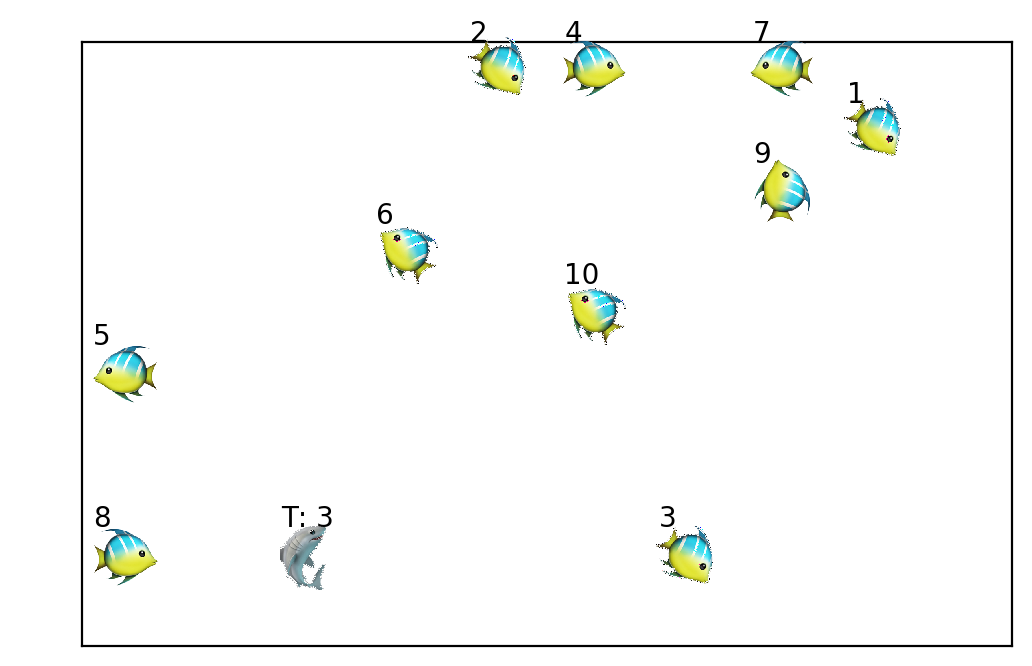

Step: 2
Agent-Specific Rewards: {0: -0.022222222222222223, 1: 0.018967853124294973, 2: 0.0032543690979272553, 3: 0.00785674201318386, 4: 0.018967853124294973, 5: 0.04904681735970105, 6: 0.022222222222222223, 7: 0.01571348402636772, 8: 0.05230118645762831, 9: 0.05230118645762831, 'global': 0.21840949166102647}
Sum of Individual Rewards: 0.21840949166102647


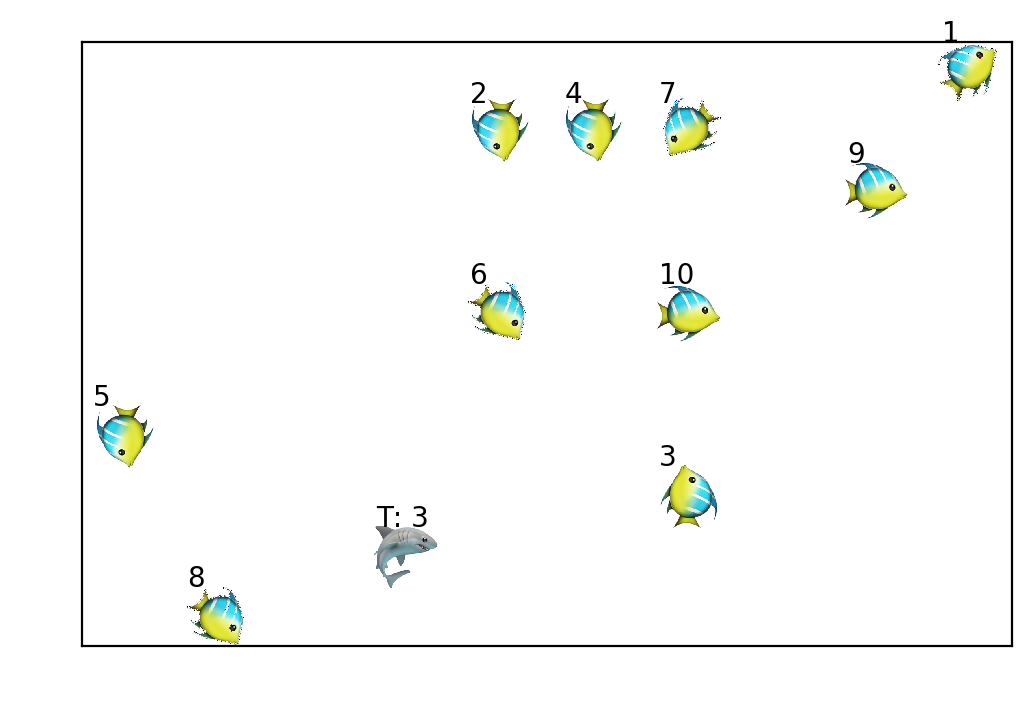

Step: 3
Agent-Specific Rewards: {0: -0.015039482117703043, 1: -0.015039482117703043, 2: 0.026150593228814155, 3: -0.015039482117703043, 4: 0.010437109202446424, 5: 0.0016271845489636227, 6: 0.009483926562147488, 7: 0.020595037673258598, 8: 0.038214886980224204, 9: -0.0006740019086646874, 'global': 0.060716289934080694}
Sum of Individual Rewards: 0.060716289934080674


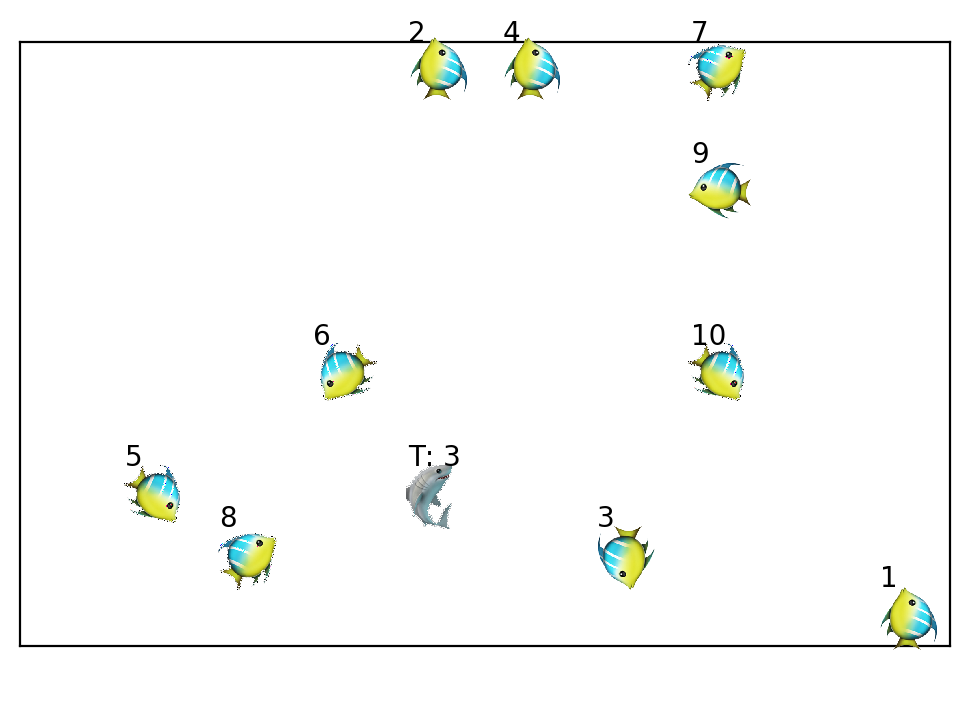

Step: 4
Agent-Specific Rewards: {0: 0, 1: 0, 2: -10, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 'global': -10}
Sum of Individual Rewards: -10


/Users/rtl/anaconda2/envs/swarm/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


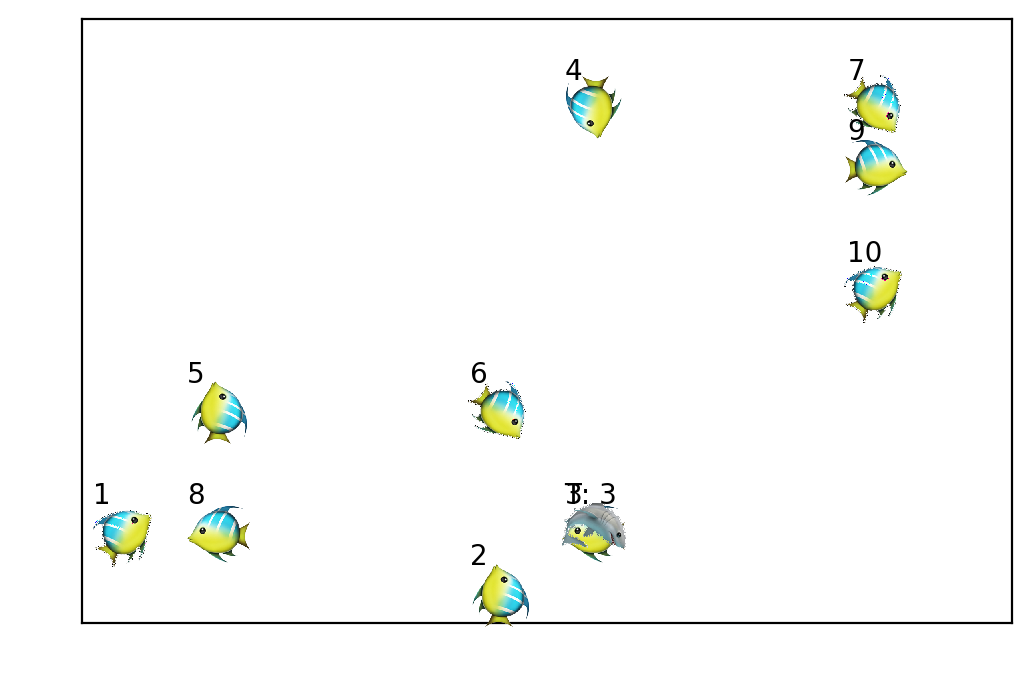

In [10]:
# Run a few steps with the random agent and global reward
state = env.reset()
for i in range(max_steps):
    action = random_agent.random_action()
    next_state, rewards, done, _ = env.step(action, reward_type={"attraction": True,
                                                                 "repulsion": True,
                                                                 "alignment": True,
                                                                 "indiv_rewards": True,
                                                                 "vf_size": None})
    state = next_state
    print("Step: {}".format(i + 1))
    print("Agent-Specific Rewards: {}".format(rewards))
    summed_indiv_reward = sum([value for key, value in rewards.items() if key != "global"])
    print("Sum of Individual Rewards: {}".format(summed_indiv_reward))
    env.render()
    if done:
        break

In [14]:
# Run a few steps with the random agent and global reward
state = env.reset()
for i in range(max_steps):
    action = random_agent.random_action()
    next_state, rewards, done, _ = env.step(action, reward_type={"attraction": False,
                                                                 "repulsion": False,
                                                                 "alignment": False,
                                                                 "indiv_rewards": True,
                                                                 "vf_size": None})
    state = next_state
    print("Step: {}".format(i + 1))
    print("Agent-Specific Rewards: {}".format(rewards))
    summed_indiv_reward = sum([value for key, value in rewards.items() if key != "global"])
    print("Sum of Individual Rewards: {}".format(summed_indiv_reward))
    # env.render()
    if done:
        break

Step: 1
Agent-Specific Rewards: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 'global': 0.0}
Sum of Individual Rewards: 0.0
Step: 2
Agent-Specific Rewards: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 'global': 0.0}
Sum of Individual Rewards: 0.0
Step: 3
Agent-Specific Rewards: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 'global': 0.0}
Sum of Individual Rewards: 0.0
Step: 4
Agent-Specific Rewards: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 'global': 0.0}
Sum of Individual Rewards: 0.0
Step: 5
Agent-Specific Rewards: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 'global': 0.0}
Sum of Individual Rewards: 0.0
Step: 6
Agent-Specific Rewards: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: -10, 'global': -10}
Sum of Individual Rewards: -10


In [16]:
# Run a few steps with the random agent and global reward
state = env.reset()
for i in range(max_steps):
    action = random_agent.random_action()
    next_state, rewards, done, _ = env.step(action, reward_type={"attraction": True,
                                                                 "repulsion": True,
                                                                 "alignment": False,
                                                                 "indiv_rewards": True,
                                                                 "vf_size": None})
    state = next_state
    print("Step: {}".format(i + 1))
    print("Agent-Specific Rewards: {}".format(rewards))
    summed_indiv_reward = sum([value for key, value in rewards.items() if key != "global"])
    print("Sum of Individual Rewards: {}".format(summed_indiv_reward))
    # env.render()
    if done:
        break

Step: 1
Agent-Specific Rewards: {0: 0.07777777777777778, 1: 0.07777777777777778, 2: 0.05555555555555555, 3: 0.06666666666666667, 4: 0.1, 5: 0.044444444444444446, 6: 0.05555555555555555, 7: 0.06666666666666667, 8: 0.07777777777777778, 9: 0.08888888888888889, 'global': 0.7111111111111111}
Sum of Individual Rewards: 0.7111111111111111
Step: 2
Agent-Specific Rewards: {0: 0.044444444444444446, 1: 0.07777777777777778, 2: 0.03333333333333333, 3: 0.044444444444444446, 4: 0.05555555555555555, 5: 0.044444444444444446, 6: 0.07777777777777778, 7: 0.1, 8: 0.06666666666666667, 9: 0.07777777777777778, 'global': 0.6222222222222222}
Sum of Individual Rewards: 0.6222222222222222
Step: 3
Agent-Specific Rewards: {0: 0.07777777777777778, 1: 0.07777777777777778, 2: 0.06666666666666667, 3: 0.07777777777777778, 4: 0.06666666666666667, 5: 0.044444444444444446, 6: 0.06666666666666667, 7: 0.08888888888888889, 8: 0.044444444444444446, 9: 0.03333333333333333, 'global': 0.6444444444444445}
Sum of Individual Rewards

In [17]:
env = gym.make("Swarm-v0")

agents_list = np.arange(5, 1000, 100).tolist()
num_runs = 5

mean_init_time = np.zeros((len(agents_list)))
sd_init_time = np.zeros((len(agents_list)))

mean_exec_time = np.zeros((len(agents_list)))
sd_exec_time = np.zeros((len(agents_list)))

for i, n_agents in enumerate(agents_list):
    init_time_temp = []
    exec_time_temp = []
    
    for run in range(num_runs):
        start = time.time()
        env.set_env_parameters(num_agents=n_agents,
                               obs_space_size=10000,
                               verbose=False)
        state = env.reset()
        total_init = time.time() - start
        init_time_temp.append(total_init)

        random_agent = RandomAgents(env)
        action = random_agent.random_action()

        start = time.time()
        next_state, reward, done, _ = env.step(action)
        total_exec = time.time() - start
        exec_time_temp.append(total_exec)
    
    mean_init_time[i] = np.array(init_time_temp).mean()
    sd_init_time[i] = np.array(init_time_temp).std()

    mean_exec_time[i] = np.array(exec_time_temp).mean()
    sd_exec_time[i] = np.array(exec_time_temp).std()


/Users/rtl/anaconda2/envs/swarm/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


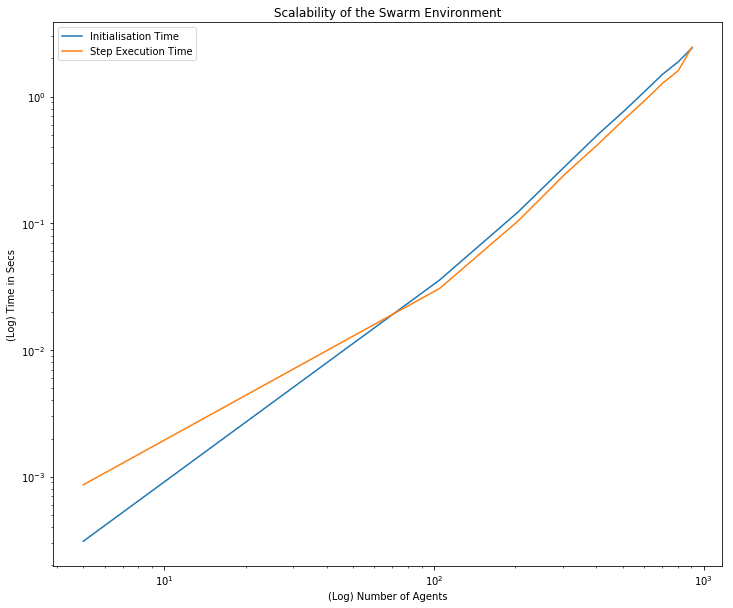

In [18]:
plt.figure(figsize=(12,10))
plt.loglog(agents_list, mean_init_time, label="Initialisation Time")
#plt.fill_between(agents_list,
#                 mean_init_time - 2*sd_init_time,
#                 mean_init_time + 2*sd_init_time,
#                 alpha=0.25)

plt.loglog(agents_list, mean_exec_time, label="Step Execution Time")
#plt.fill_between(agents_list,
#                 mean_exec_time - 2*sd_exec_time,
#                 mean_exec_time + 2*sd_exec_time,
#                 alpha=0.25)

plt.xlabel("(Log) Number of Agents")
plt.ylabel("(Log) Time in Secs")
plt.title("Scalability of the Swarm Environment")
plt.legend(loc=2)

plt.savefig("gym_swarm/images/scalability.png", dpi=300)